In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef, accuracy_score, balanced_accuracy_score, f1_score, average_precision_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold

# Load data

In [2]:
X_train = np.load("../data/DRIAMS-B/siamese_embeddings/embeddings_zero_shot_train.npy")
X_val = np.load("../data/DRIAMS-B/siamese_embeddings/embeddings_zero_shot_val.npy")
X_train.shape

(24551, 1024)

In [3]:
train_samples = pd.read_csv("../data/DRIAMS-B/siamese_embeddings/zero_shot_spect_drugEmbFingerPrint_Resist_train_subset.csv")
val_samples = pd.read_csv("../data/DRIAMS-B/siamese_embeddings/zero_shot_spect_drugEmbFingerPrint_Resist_val_subset.csv")
val_samples

,sample_id,drug,species,response,dataset
0,0043f2aa-7a23-4a9a-a83b-9237a365fc88,benzylpenicillin,Staphylococcus caprae,1,B
1,0043f2aa-7a23-4a9a-a83b-9237a365fc88,ciprofloxacin,Staphylococcus caprae,0,B
2,0043f2aa-7a23-4a9a-a83b-9237a365fc88,clindamycin,Staphylococcus caprae,0,B
3,0043f2aa-7a23-4a9a-a83b-9237a365fc88,daptomycin,Staphylococcus caprae,0,B
4,0043f2aa-7a23-4a9a-a83b-9237a365fc88,erythromycin,Staphylococcus caprae,0,B
...,...,...,...,...,...
6132,ffe0a561-85df-4480-ba08-d42020f40c01,erythromycin,Streptococcus pneumoniae,0,B
6133,ffe0a561-85df-4480-ba08-d42020f40c01,levofloxacin,Streptococcus pneumoniae,0,B
6134,ffe0a561-85df-4480-ba08-d42020f40c01,tetracycline,Streptococcus pneumoniae,0,B
6135,ffe0a561-85df-4480-ba08-d42020f40c01,vancomycin,Streptococcus pneumoniae,0,B


In [4]:
y_train = train_samples["response"].values
y_val = val_samples["response"].values

In [5]:
# Remove constant features

var_thr = VarianceThreshold() #Removing constant by default
var_thr.fit(X_train)
var_supp = var_thr.get_support()

X_train = X_train[:, var_supp]
X_val = X_val[:, var_supp]

In [6]:
# No collinear features with the 0.99 threshold

corr = np.corrcoef(X_train.T)
print(corr.shape)
(np.triu(corr, k=1)>0.99).sum()


(242, 242)


0

# Train and evaluate model

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val) # Predict label
y_proba = logreg.predict_proba(X_val) # Predict probability

In [8]:
# Evaluate metrics
val_metrics = {
        "mcc": matthews_corrcoef(y_val, y_pred),
        "balanced_accuracy": balanced_accuracy_score(y_val, y_pred),
        "f1": f1_score(y_val, y_pred, zero_division=0),
        "AUPRC": average_precision_score(y_val, y_proba[:, 1]),
        "precision": precision_score(y_val, y_pred, zero_division=0),
        "recall": recall_score(y_val, y_pred, zero_division=0)
    }
val_metrics

{'mcc': 0.3684768509732333,
 'balanced_accuracy': 0.632411523720176,
 'f1': 0.4152880775812892,
 'AUPRC': 0.48302689107477764,
 'precision': 0.663023679417122,
 'recall': 0.3023255813953488}

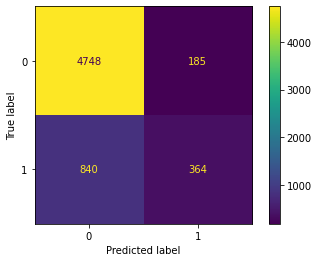

In [9]:
cmat = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cmat).plot()
plt.show()

In [11]:
matthews_corrcoef(y_val, y_pred)

0.3684768509732333

In [12]:
matthews_corrcoef(1-y_val, 1-y_pred)

0.3684768509732333